# Install YOLOv8

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

Ultralytics YOLOv8.1.16 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


# Training On Custom Dataset

In [4]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet


from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("huiyao-hu-sj18e").project("construction-ppe-detection")
dataset = project.version(1).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
loading Roboflo


Extracting Dataset Version Zip to Construction-PPE-Detection-1 in yolov8:: 100%|██████████| 10034/10034 [00:02<00:00, 4990.74it/s]


In [9]:
import yaml

# Membaca file data.yaml
with open('/content/datasets/Construction-PPE-Detection-1/data.yaml', 'r') as file:
    data = yaml.safe_load(file)

# Mengubah nilai train dan val
data['train'] = '../train/images'
data['val'] = '../valid/images'

# Menulis kembali data.yaml
with open('/content/datasets/Construction-PPE-Detection-1/data.yaml', 'w') as file:
    yaml.dump(data, file)


In [10]:
!mkdir {HOME}/datasets2
%cd {HOME}/datasets2

project = rf.workspace("hx-hezqh").project("ppe-detection-yfmym")
dataset = project.version(1).download("yolov8")

/content/datasets2
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.16, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to PPE-Detection-1 in yolov8:: 100%|██████████| 4406/4406 [00:00<00:00, 4526.07it/s]


In [11]:
import yaml

# Membaca file data.yaml
with open('/content/datasets2/PPE-Detection-1/data.yaml', 'r') as file:
    data = yaml.safe_load(file)

# Mengubah nilai train dan val
data['train'] = '../train/images'
data['val'] = '../valid/images'

# Menulis kembali data.yaml
with open('/content/datasets2/PPE-Detection-1/data.yaml', 'w') as file:
    yaml.dump(data, file)

In [12]:
import os
import shutil

%cd {HOME}

# Path ke dua folder datasets
folder1_path = "datasets/Construction-PPE-Detection-1"
folder2_path = "datasets2/PPE-Detection-1"

# Path untuk folder baru
new_folder_path = "datasets3/apd"

# Fungsi untuk menyatukan isi folder
def merge_folders(src_folder, dest_folder):
    for root, dirs, files in os.walk(src_folder):
        for file in files:
            src_file_path = os.path.join(root, file)
            dest_file_path = os.path.join(dest_folder, os.path.relpath(src_file_path, src_folder))

            os.makedirs(os.path.dirname(dest_file_path), exist_ok=True)
            shutil.copy2(src_file_path, dest_file_path)

# Menyatukan isi folder train/images
merge_folders(os.path.join(folder1_path, "train/images"), os.path.join(new_folder_path, "train/images"))
# Menyatukan isi folder train/labels
merge_folders(os.path.join(folder1_path, "train/labels"), os.path.join(new_folder_path, "train/labels"))
# Menyatukan isi folder valid/images
merge_folders(os.path.join(folder1_path, "valid/images"), os.path.join(new_folder_path, "valid/images"))
# Menyatukan isi folder valid/labels
merge_folders(os.path.join(folder1_path, "valid/labels"), os.path.join(new_folder_path, "valid/labels"))

# Menyatukan isi folder train/images
merge_folders(os.path.join(folder2_path, "train/images"), os.path.join(new_folder_path, "train/images"))
# Menyatukan isi folder train/labels
merge_folders(os.path.join(folder2_path, "train/labels"), os.path.join(new_folder_path, "train/labels"))
# Menyatukan isi folder valid/images
merge_folders(os.path.join(folder2_path, "valid/images"), os.path.join(new_folder_path, "valid/images"))
# Menyatukan isi folder valid/labels
merge_folders(os.path.join(folder2_path, "valid/labels"), os.path.join(new_folder_path, "valid/labels"))
# Menyalin file README.dataset.txt, README.roboflow.txt, dan data.yaml

shutil.copy2(os.path.join(folder2_path, "data.yaml"), os.path.join(new_folder_path, "data.yaml"))

/content


'datasets3/apd/data.yaml'

In [ ]:
%cd /content/drive/MyDrive/APD

!yolo task=detect mode=train model=yolov8s.pt data={HOME}/datasets3/apd/data.yaml epochs=150 batch=32 device=0 plots=True

/content/drive/MyDrive/APD
100% 21.5M/21.5M [00:00<00:00, 155MB/s]
Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets3/apd/data.yaml, epochs=150, time=None, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, sav

In [13]:
%cd /content/drive/MyDrive/APD

!yolo task=detect mode=val model=yolov8s_ppe.pt data={HOME}/datasets3/apd/data.yaml

/content/drive/MyDrive/APD
Ultralytics YOLOv8.1.16 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets3/apd/valid/labels... 840 images, 0 backgrounds, 0 corrupt: 100% 840/840 [00:00<00:00, 2159.11it/s]
val: New cache created: /content/datasets3/apd/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 53/53 [00:19<00:00,  2.77it/s]
                   all        840       3594      0.949      0.902      0.943      0.802
                 boots        840       1186      0.985      0.928      0.979       0.81
                gloves        840         82      0.884       0.78      0.836      0.608
                helmet        840        640      0.962      0.953      0.967      0.817
                 human        840        752      0.932       0.92      0.956      0.884
                  vest        840    

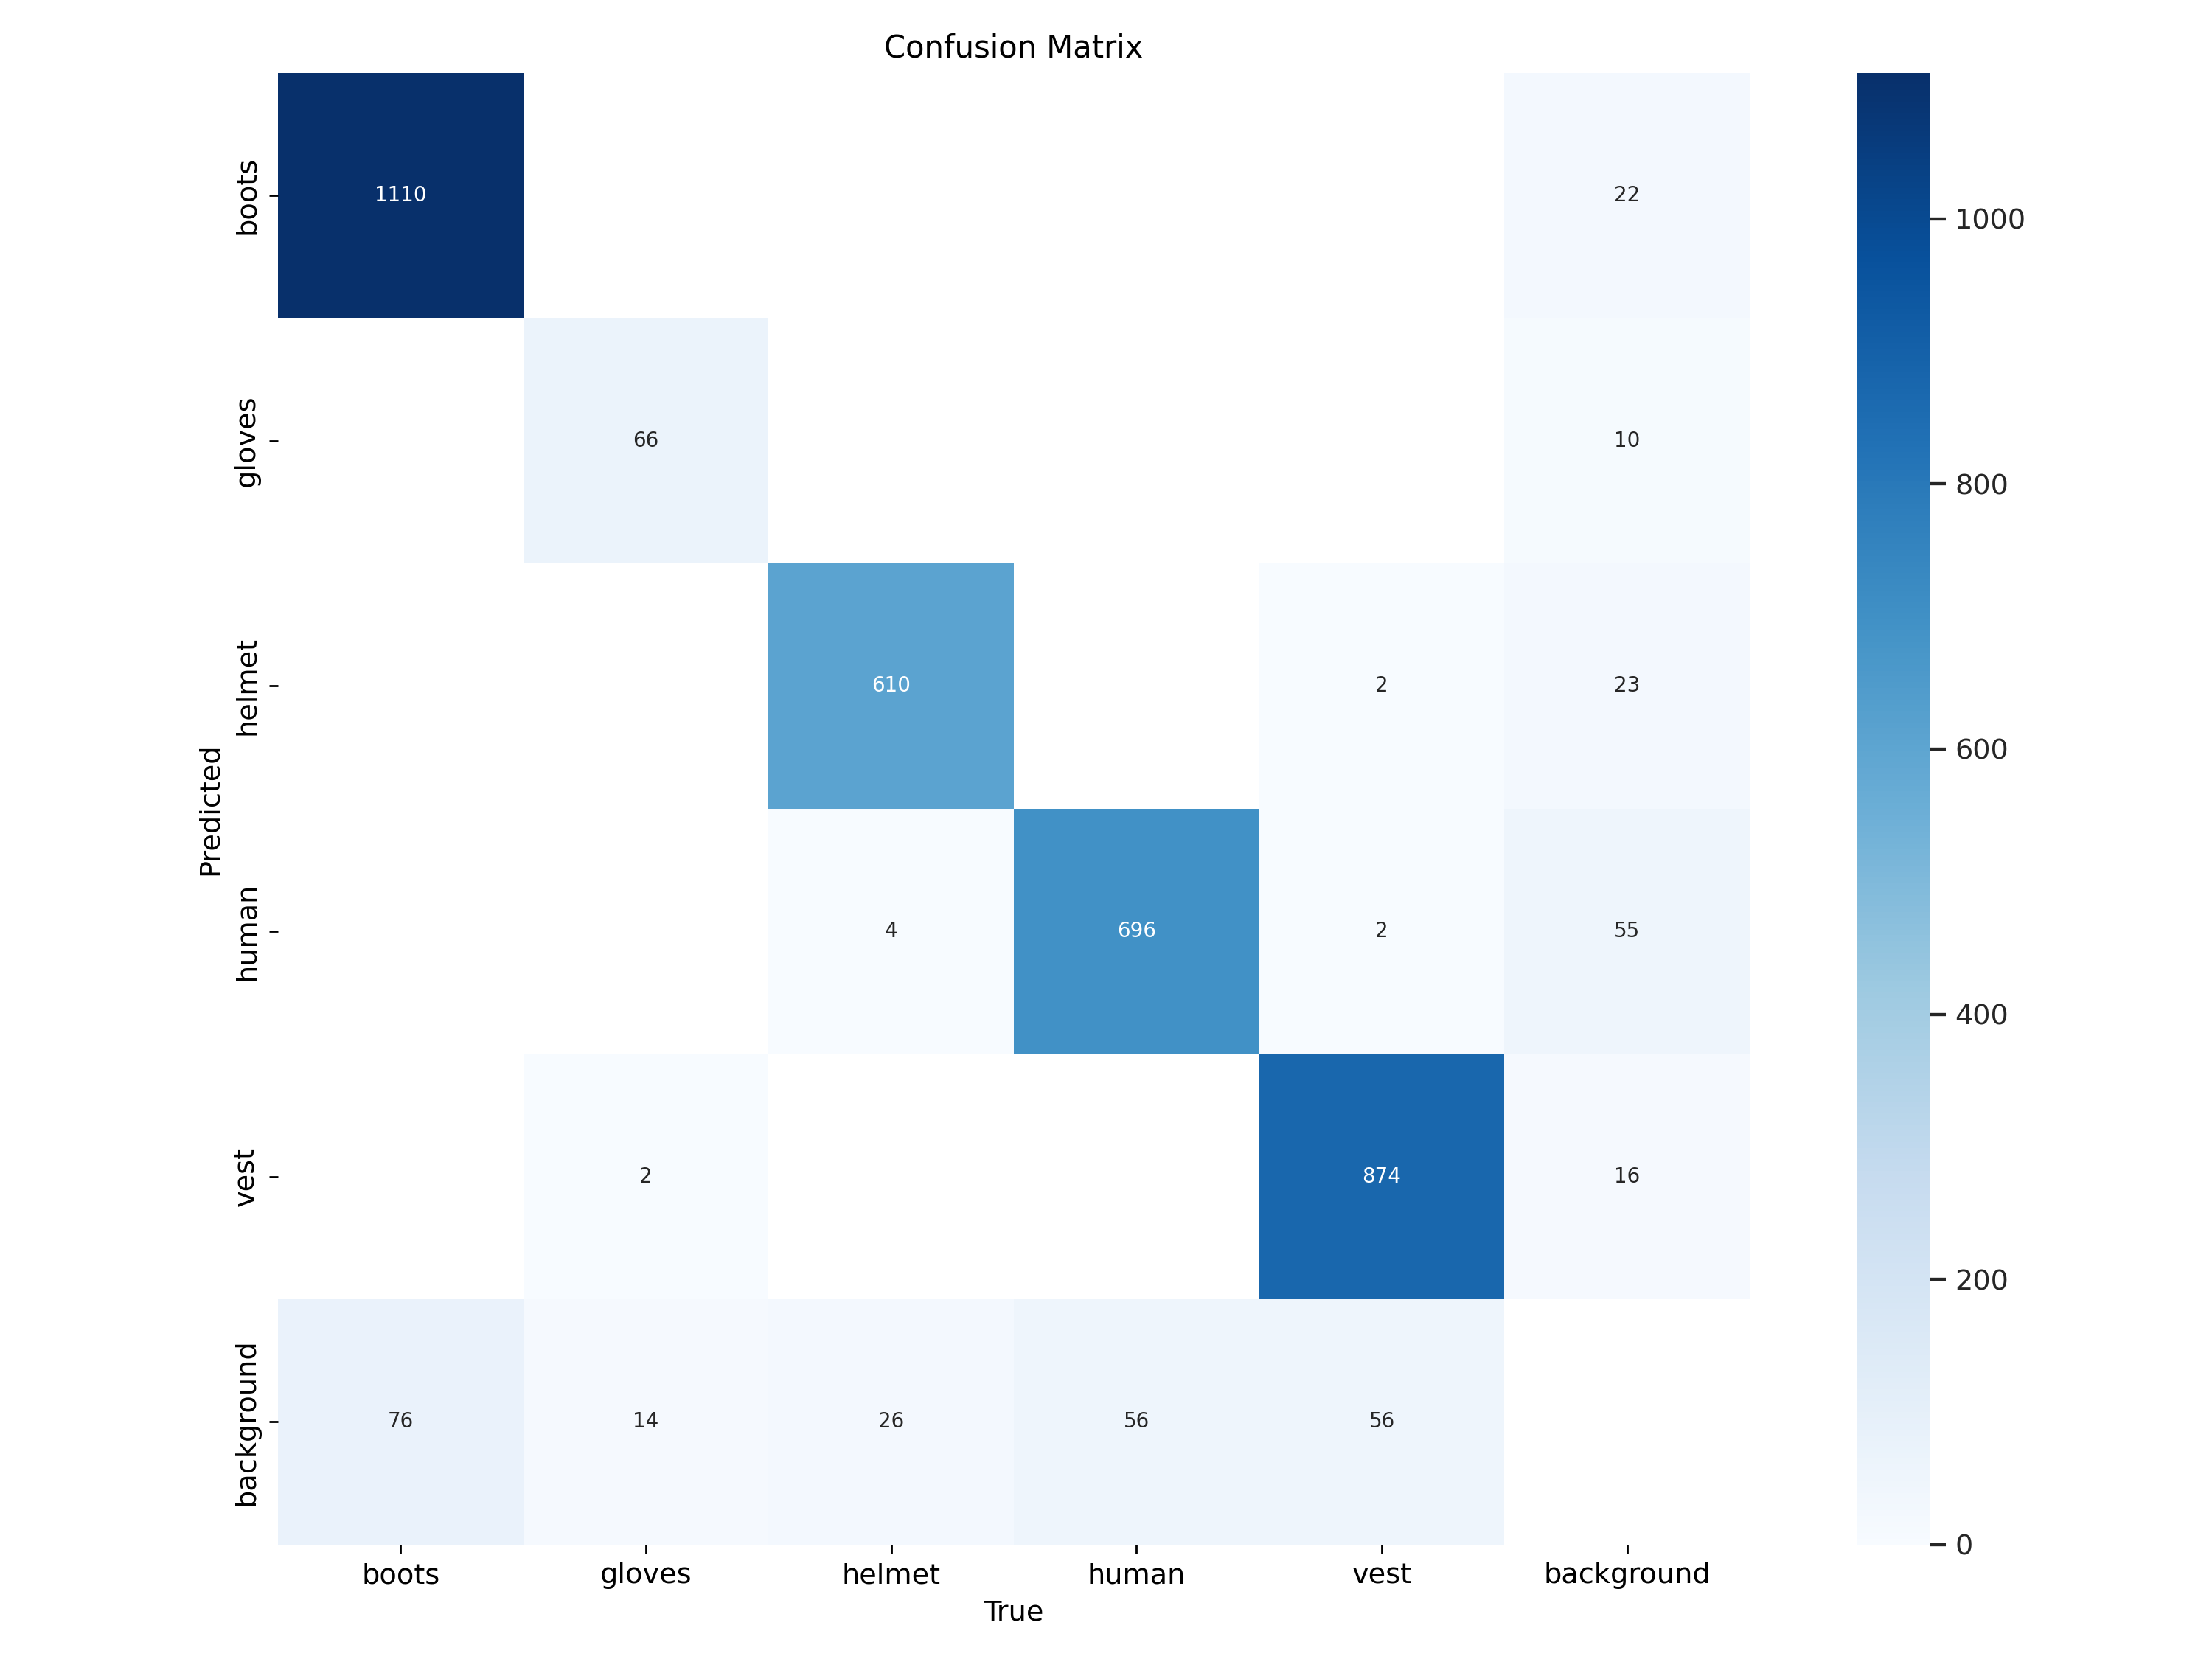

In [14]:
from IPython.display import display, Image

Image(filename=f'runs/detect/val/confusion_matrix.png', width=600)

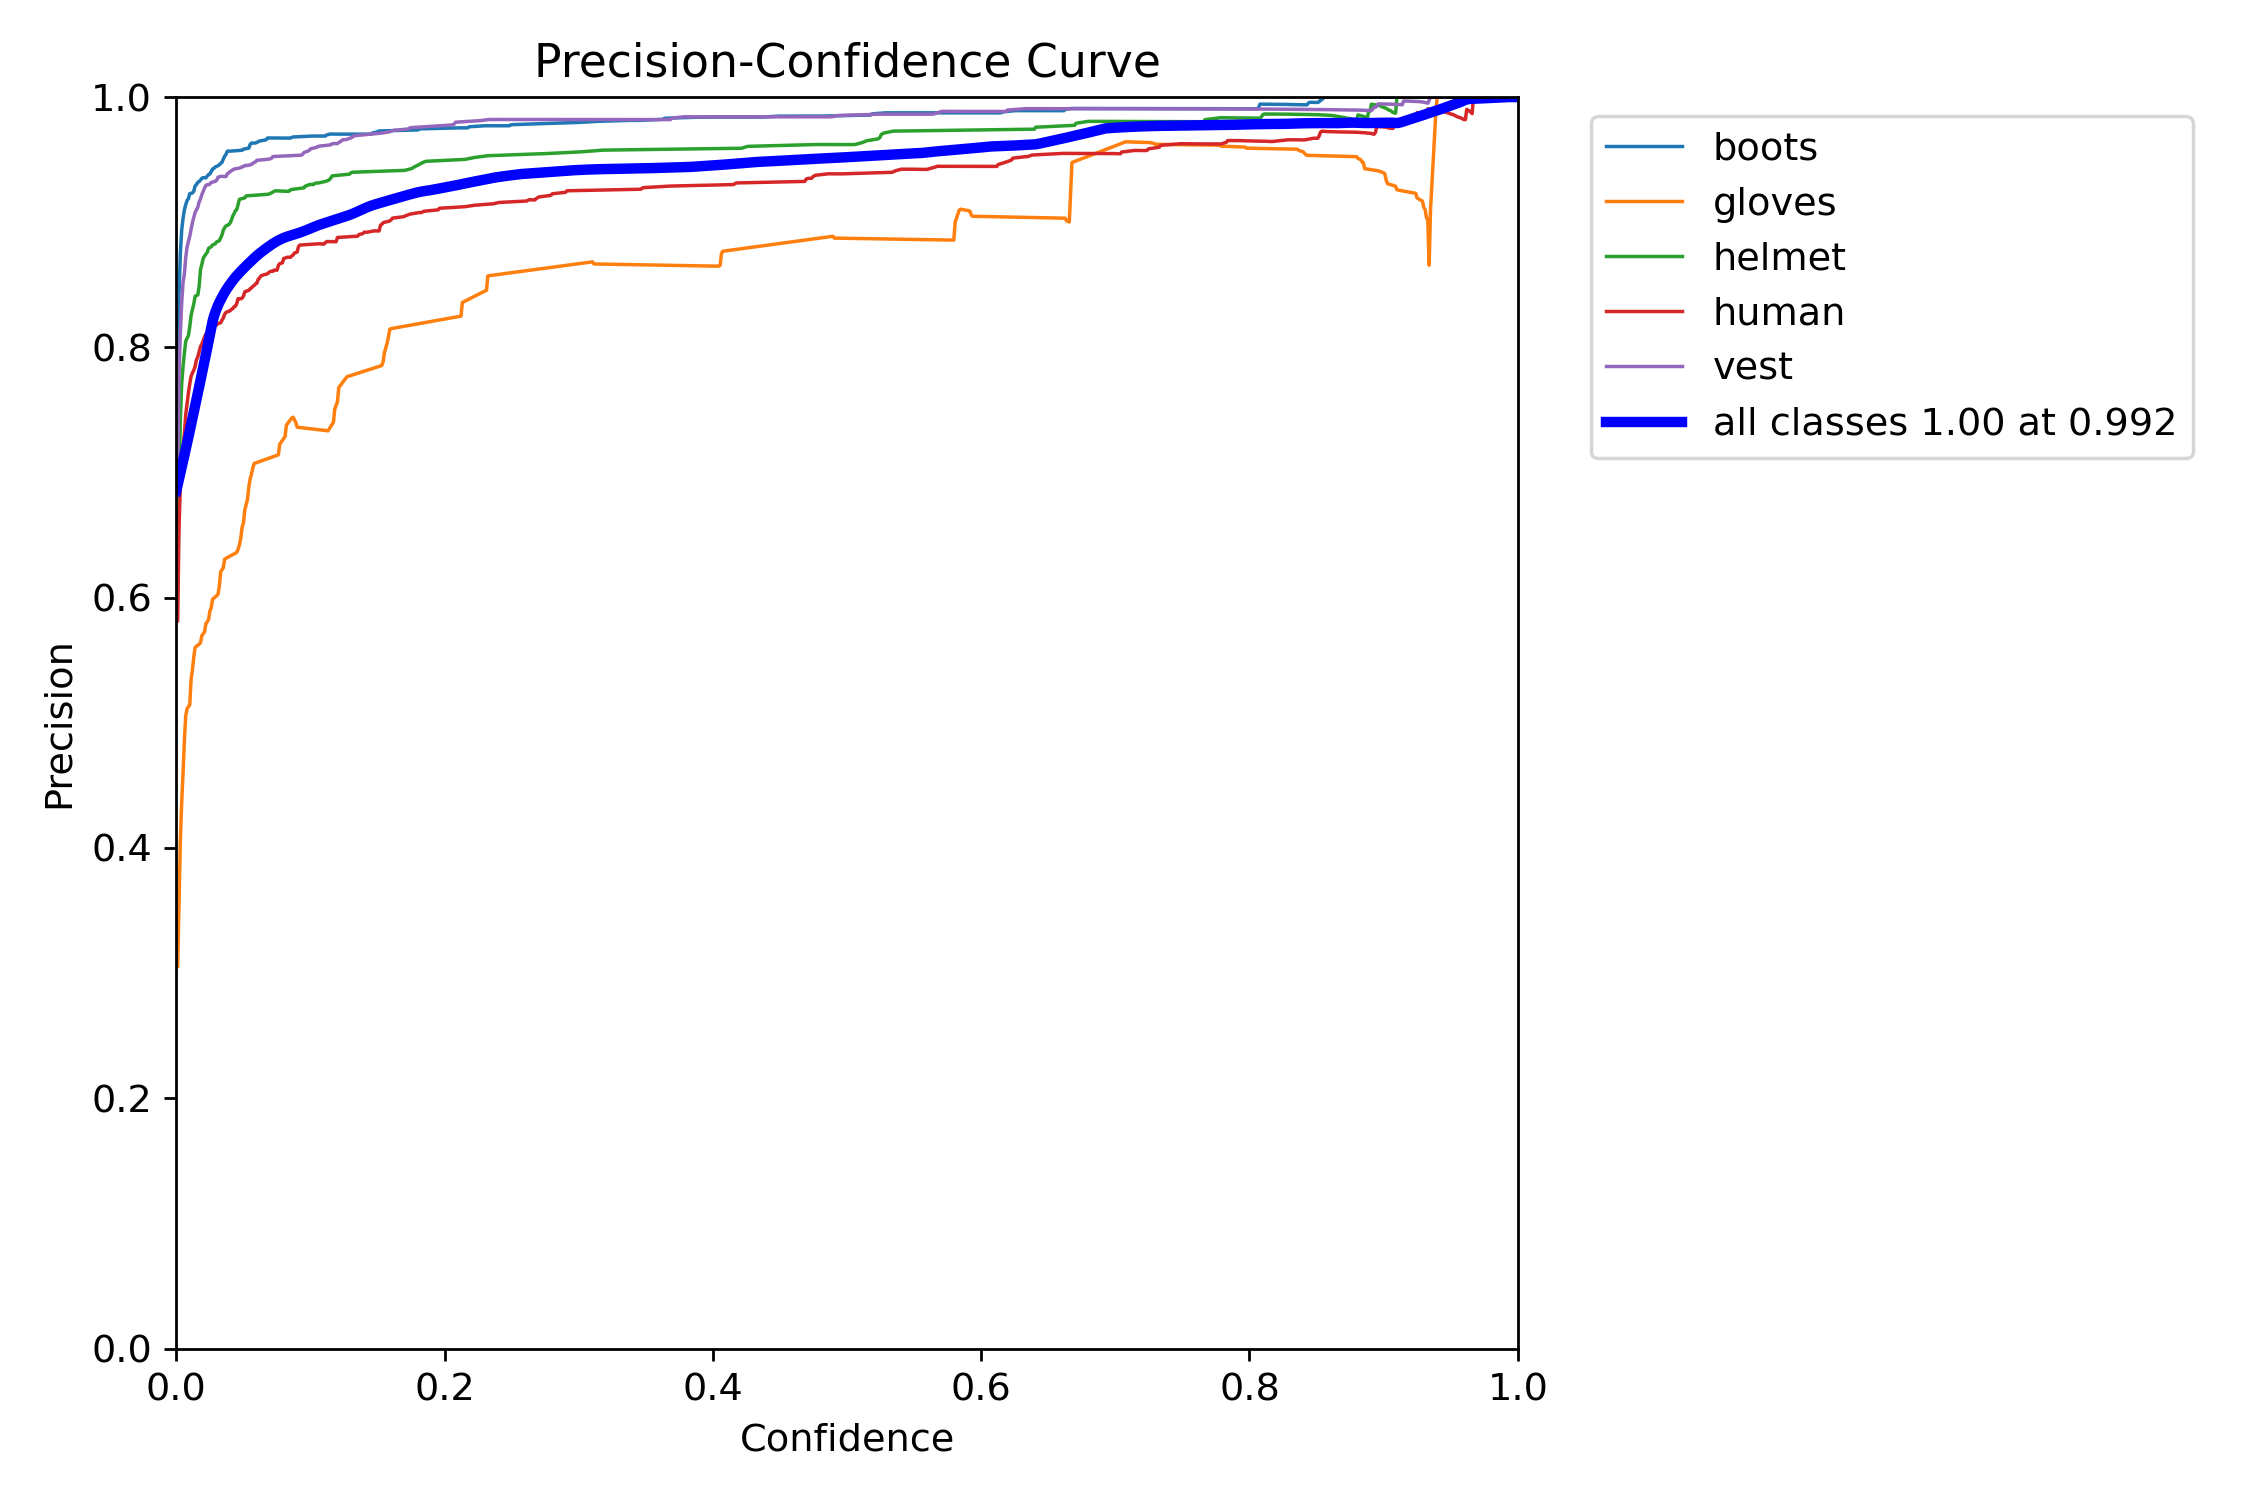

In [16]:
Image(filename=f'runs/detect/val/P_curve.png', width=600)